<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Practical Work 1: Recognizing Iris flowers

### [Luis Martí](http://lmarti.com)
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
$\renewcommand{\vec}[1]{\boldsymbol{#1}}$

# Introduction

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimetres. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris setosa
      <img src='imgs/05/iris_setosa.jpg'/>
      </div></div>
      <div class='col-md-4' align='center'><div class="well well-sm">
      Iris versicolor
      <img width='86.5%'src='imgs/05/iris_versicolor.jpg'/>
      </div></div>
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris virginica
      <img src='imgs/05/iris_virginica.jpg' width='80%'/>
      </div></div>
  </div>
</div>

# Problem description

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

In [1]:
import numpy as np

In [2]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading the Iris Data with `scikit-learn`

`scikit-learn` has a very straightforward set of data on these iris species.  The data consist of
the following:

* Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

* Target classes to predict:
  1. Iris setosa
  2. Iris versicolour
  3. Iris virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting `iris_data` dataset is a `Bunch` object, that can be viewed as supercharged `dict`. For example, you can see what's available using the `keys()` method:

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Similary you can checkout the problem description that is attached to the dataset.

In [5]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

`iris_data.data` contains the input data (our $X$'s) and `iris_data.target` contain the expected values (our $y$'s)

In [6]:
n_samples, n_features = iris_data.data.shape
print(n_samples)
print(n_features)
print(iris_data.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [7]:
print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


In [8]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [9]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


Let's visualize the relation between the attributes. If you are running the notebook locally you will be able to 

In [10]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Widget Javascript not detected.  It may not be installed or enabled properly.


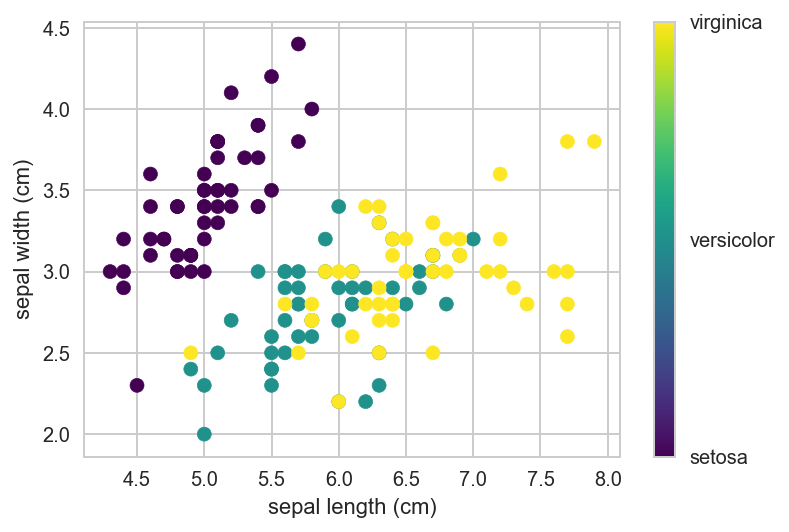

In [11]:
@interact(x_feature_index=(0,3), y_feature_index=(0,3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris_data.target_names[int(i)])

    plt.scatter(iris_data.data[:, x_feature_index], iris_data.data[:, y_feature_index], c=iris_data.target, cmap=cm.viridis)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_data.feature_names[x_feature_index]);plt.ylabel(iris_data.feature_names[y_feature_index]);

`seaborn` is another cool Python tool for creating nice-looking plots and figures. It includes some features that has to do with the Iris dataset.

In [12]:
df = seaborn.load_dataset("iris")

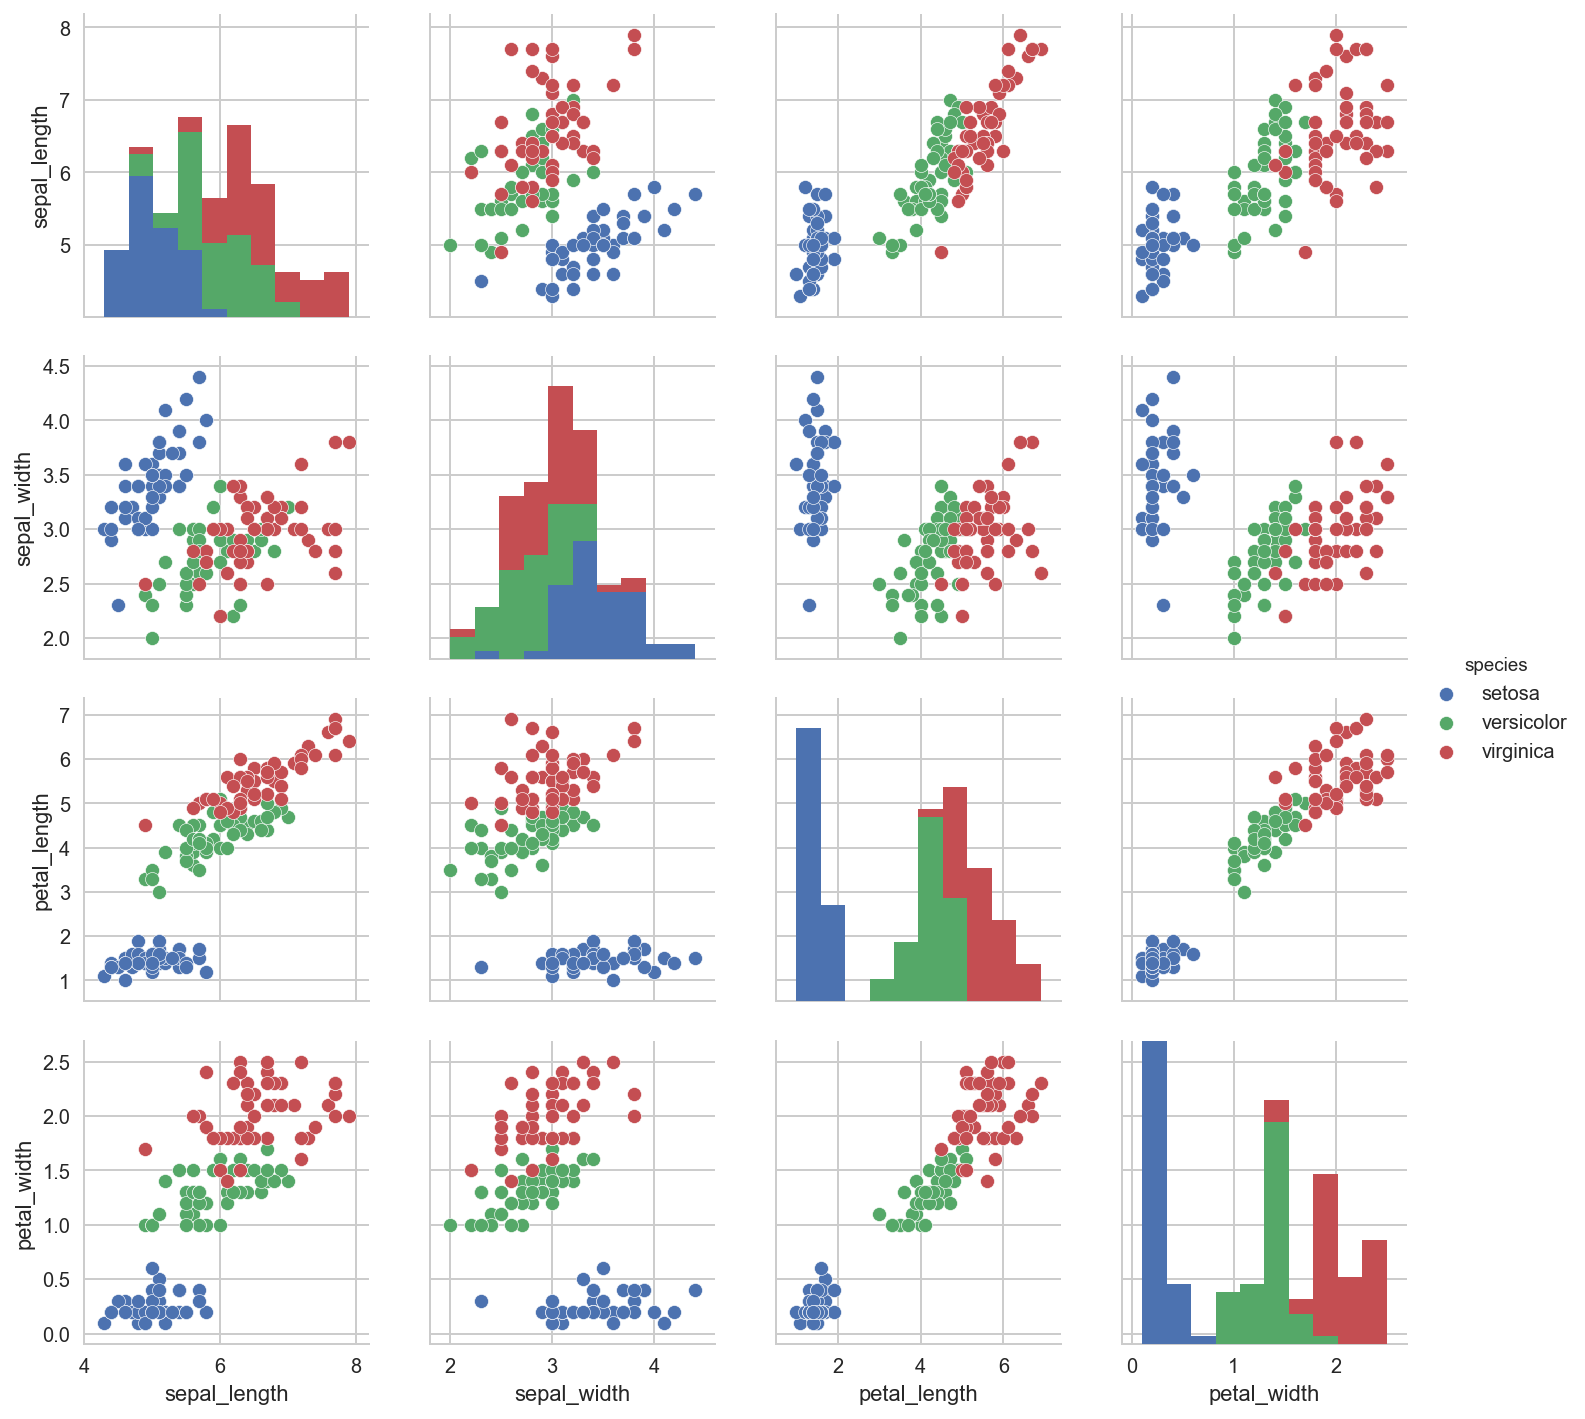

In [13]:
seaborn.pairplot(df, hue="species");

## All set...

* ...you have the data!
* You must now program *at least* two machine learning methods that learn to **recognize** the flowers in the iris dataset.
* Compare their performance.

Ask yourself some questions:

* What kind of problem is this?
* Must we transform the data?
* How would you implement the train/test/validation cycle for comparing .

## Implementation details

Please notice the special names that you should use for your classes:

In [14]:
class YourNameMethodName():
    def __init__(self, params=None):
        'If params is None the method is initialized with default values.'
        pass
    
    def predict(self, X):
        pass
    
    def learn(self, X,y):
        pass

Bear in mind:
* Prepare a Jupyter notebook describing your work and showing your results -> **plots and expected!**
* Do not used any pre-existing library (like Keras, theano, Tensoflow, etc.) for programming your algorithms.
* You may use them for support but not for the algorithm itself.
* `params` is a dictionary with the configuration of the algorithm: layers, number of nodes in each layer, activation functions, learning rates, etc.

# Submission

Submit your notebook files via email with subject `[TIC10021]` before May 28th, 2017 23:59 BST.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [15]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.0.0
OS Darwin 16.6.0 x86_64 i386 64bit
numpy 1.12.1
matplotlib 2.0.2
sklearn 0.18.1
Thu May 25 14:31:37 2017 -03

In [16]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

---